X: [[0.94520614]
 [0.98634869]
 [1.06489309]
 [0.97860478]
 [0.9367371 ]]


y: [[14.70078706]
 [14.9944968 ]
 [15.65812134]
 [14.93824882]
 [14.59540715]]
checking missing values: False
Sum of errors: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
RMSE test: 0.9745611696325205


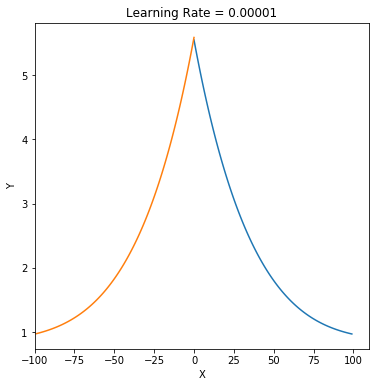

RMSE test: 0.7457940250429301


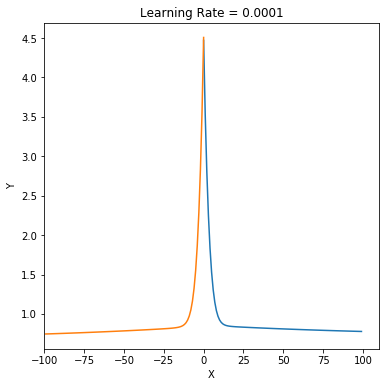

RMSE test: 0.6267548401888524


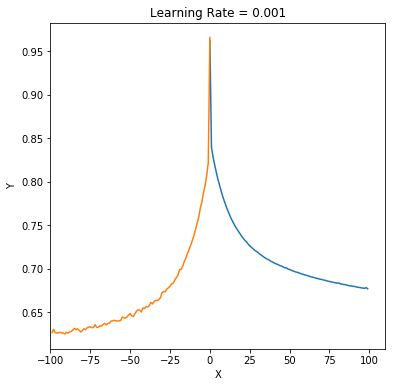

RMSE test: 0.7889343172866163


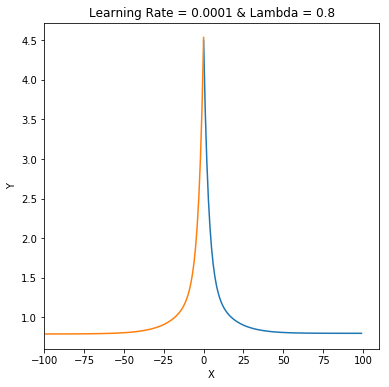

RMSE test: 0.7659424576252672


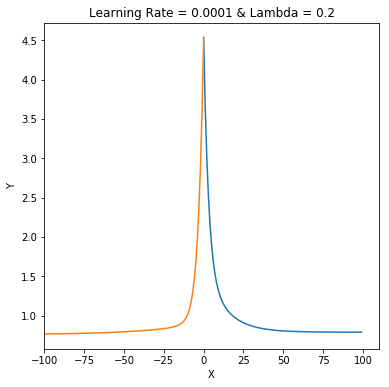

RMSE test: 0.7828331405997372


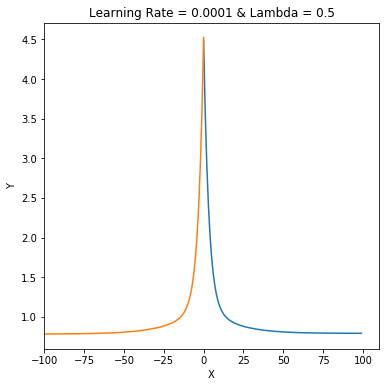

RMSE test: 0.8012122384001842


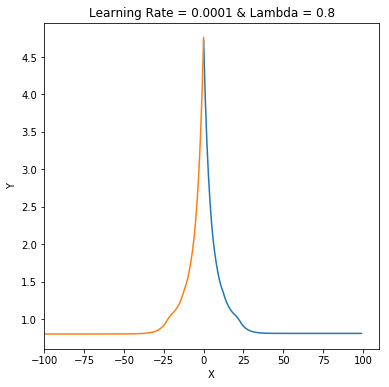

RMSE test: 0.8061146186993237


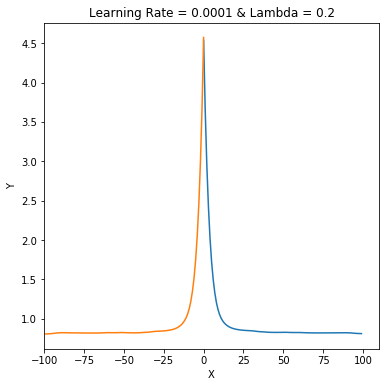

RMSE test: 0.8012338952186141


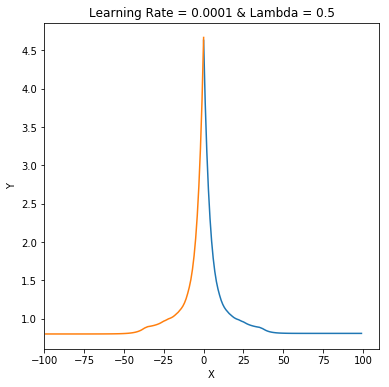

Best score: 0.20781459001958902


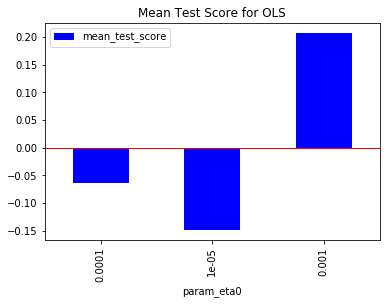

Best score: 0.20781459001958902


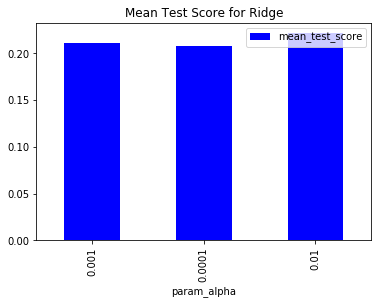

Best score: 0.20781459001958902


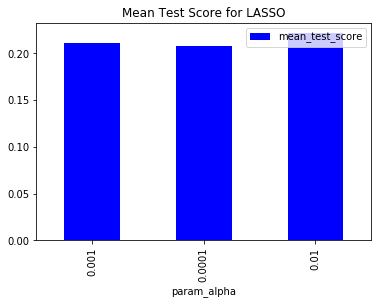

Cross Validation OLS: [0.24546509 0.21394921 0.23375992 0.16332196 0.18647486]


Cross Validation Ridge: [0.25020776 0.23021281 0.2341357  0.18919571 0.213593  ]


Cross Validation Lasso: [0.23327785 0.20772981 0.21929566 0.17942872 0.19319631]




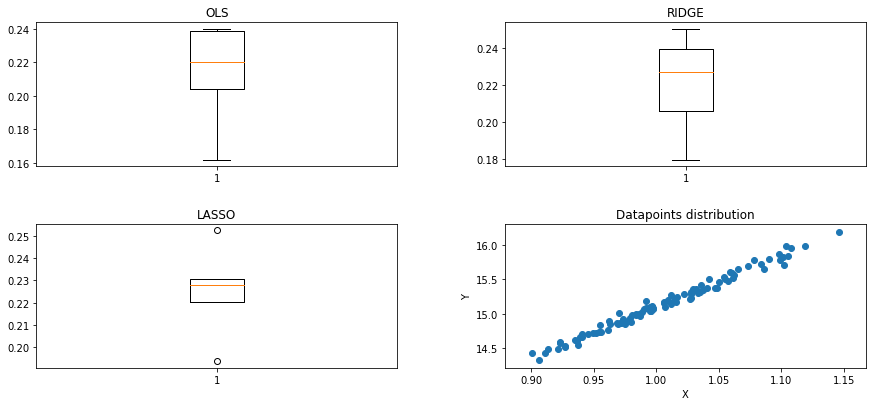

Degree: 1 RMSE 0.05113605600973697
Degree: 2 RMSE 0.05113118722869207
Degree: 7 RMSE 0.05071246233420161
Degree: 10 RMSE 0.049763974964755174
Degree: 16 RMSE 0.049741484694958725
Degree: 100 RMSE 0.04695528875844894
Lambdas: 0 RMSE 0.049771746873652094
Lambdas: 1e-06 RMSE 0.0511161001340442
Lambdas: 0.01 RMSE 0.05190633388713868
Lambdas: 1 RMSE 0.07761020079184665
Final Betas 
 [[ 5.80094413]
 [ 0.09243506]
 [-1.62564049]
 [-0.23818641]
 [ 0.05207733]
 [-0.89514217]
 [ 0.24597495]
 [-0.83127508]
 [-0.11648133]
 [-0.75122626]
 [ 1.51067164]
 [ 1.87871669]]


betas history 
 [[[ 0.          5.62783425  5.47087537  5.3477753   5.25047055]
  [ 0.          0.10585026  0.10612064  0.07690617  0.04581601]
  [ 0.         -0.49999961 -0.7222497  -0.83621955 -0.90808512]
  [ 0.          0.47282886  0.65759617  0.72235528  0.73379007]
  [ 0.         -0.15440341 -0.06740735  0.05528999  0.1569014 ]
  [ 0.         -0.42115356 -0.68131491 -0.80977985 -0.85337636]
  [ 0.          0.09801607  0.188823

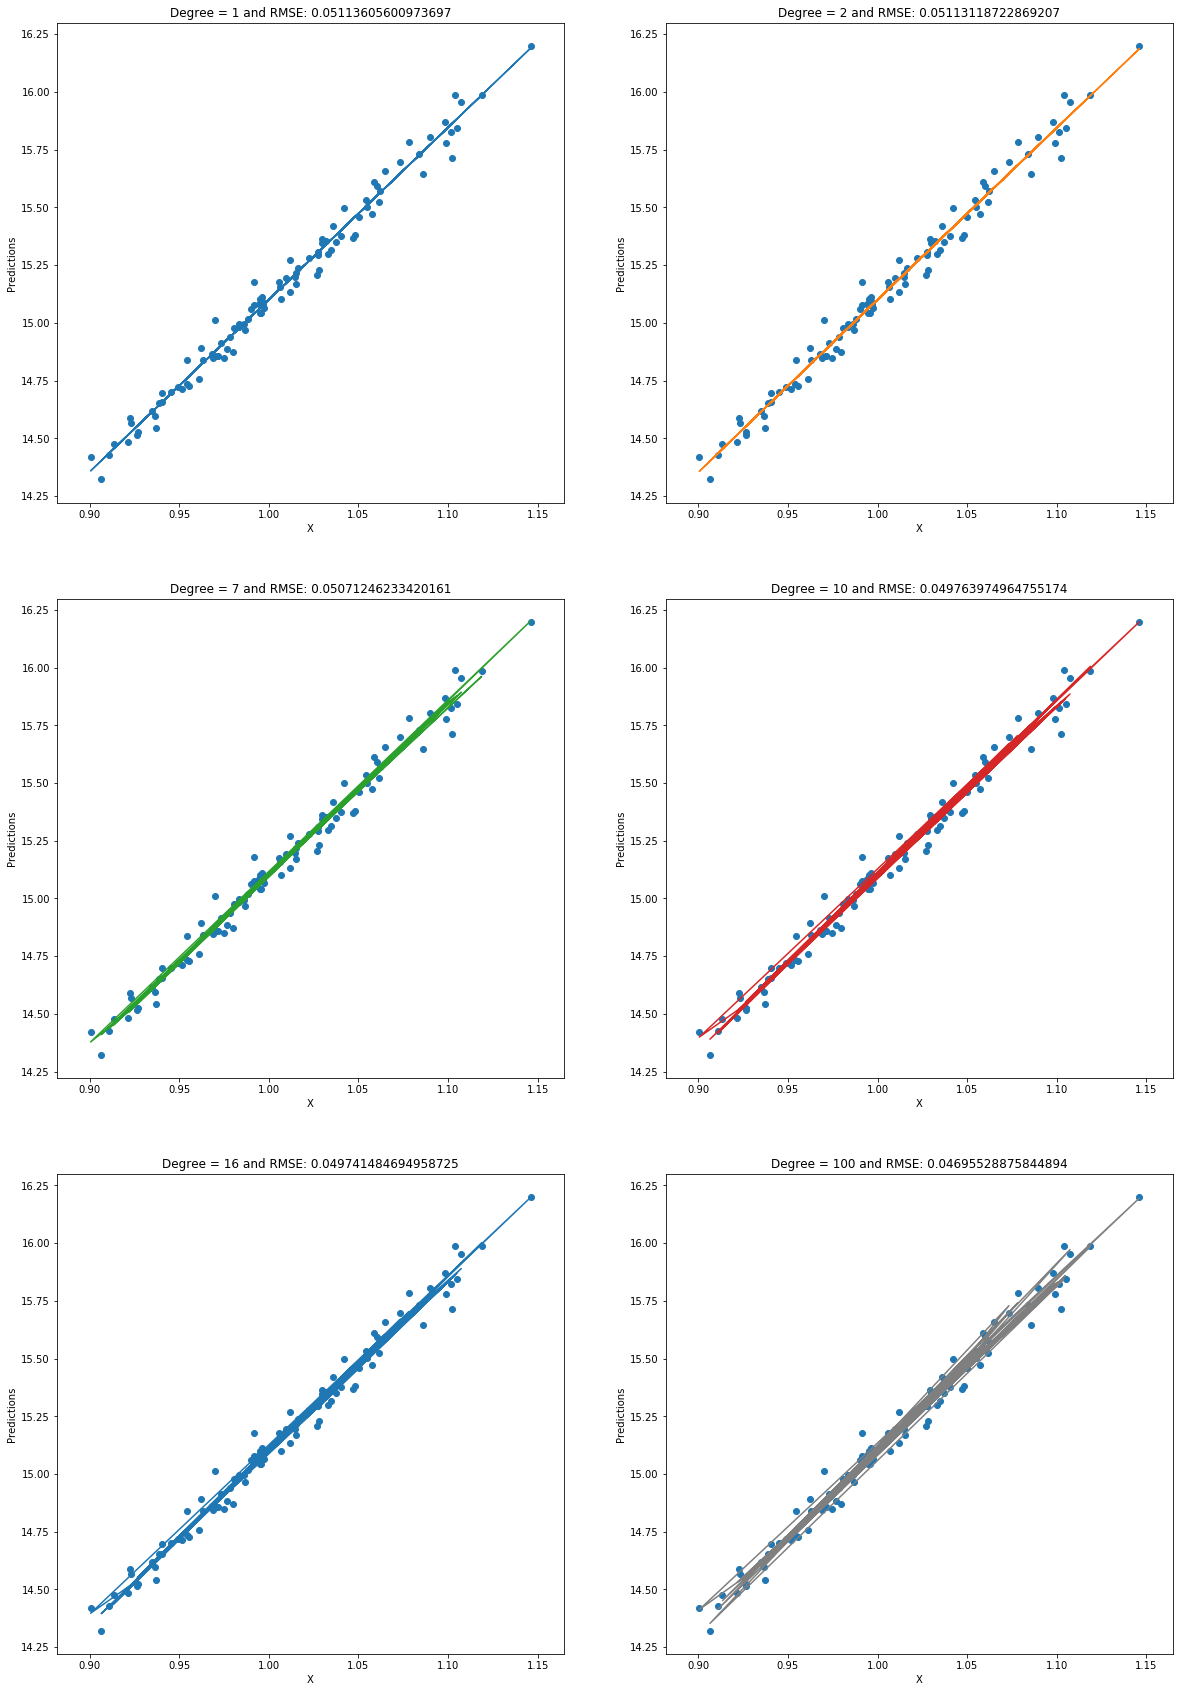

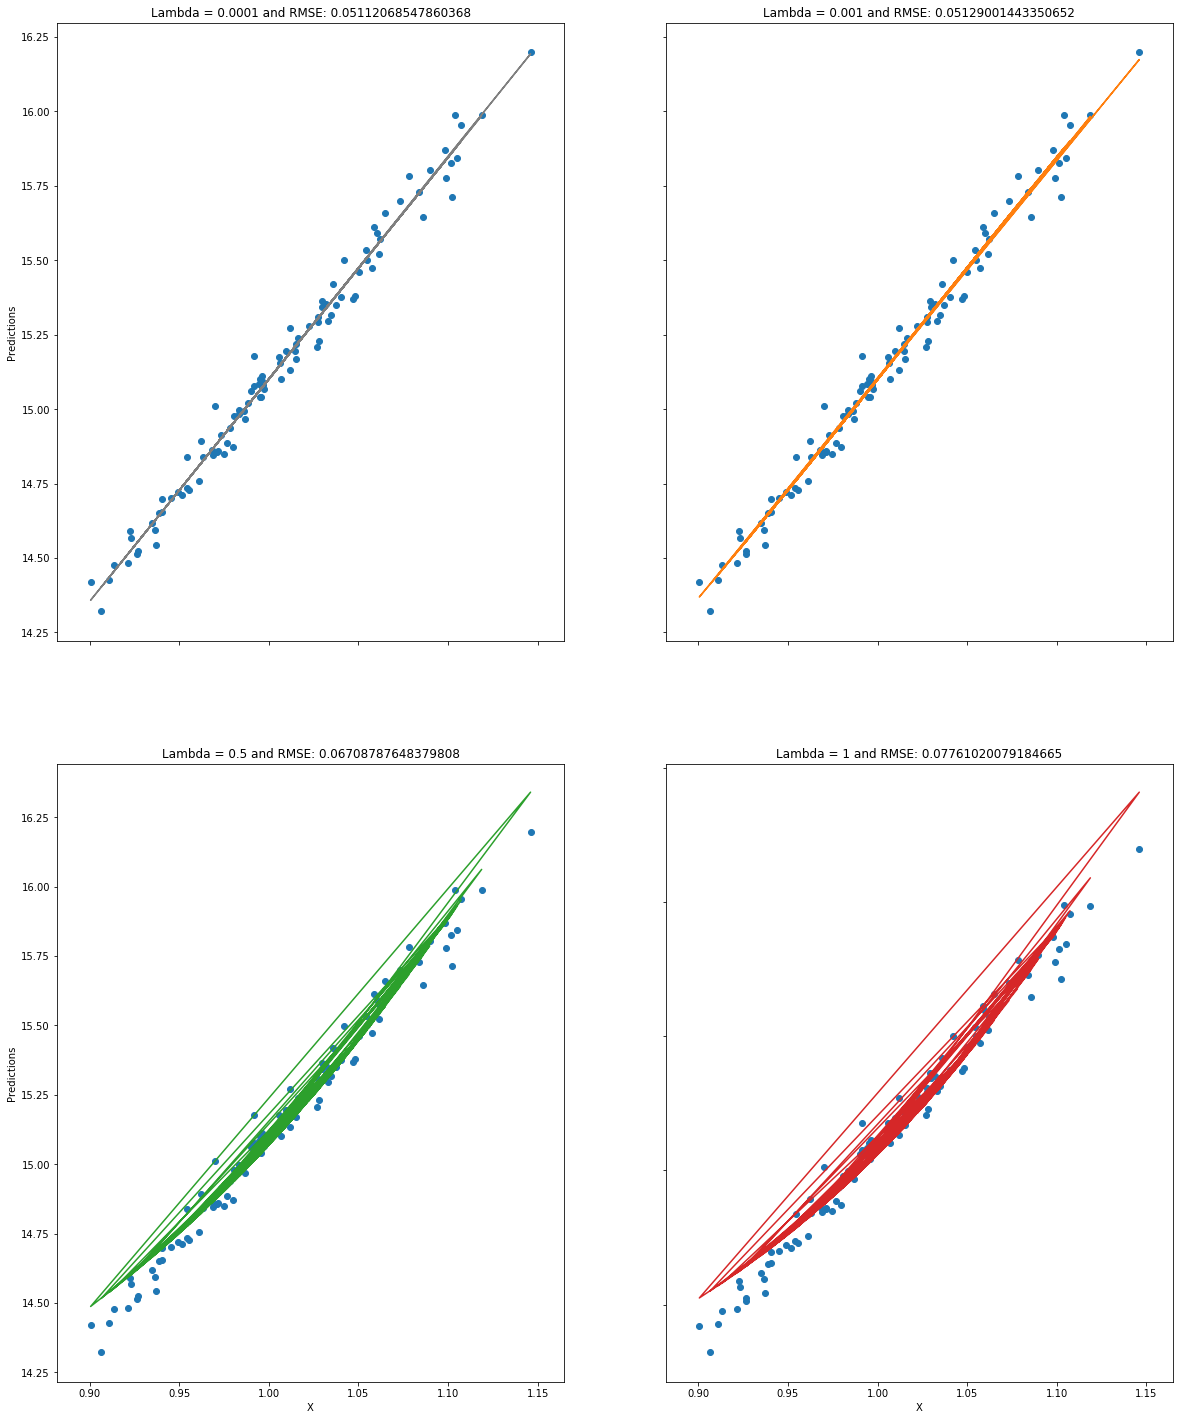

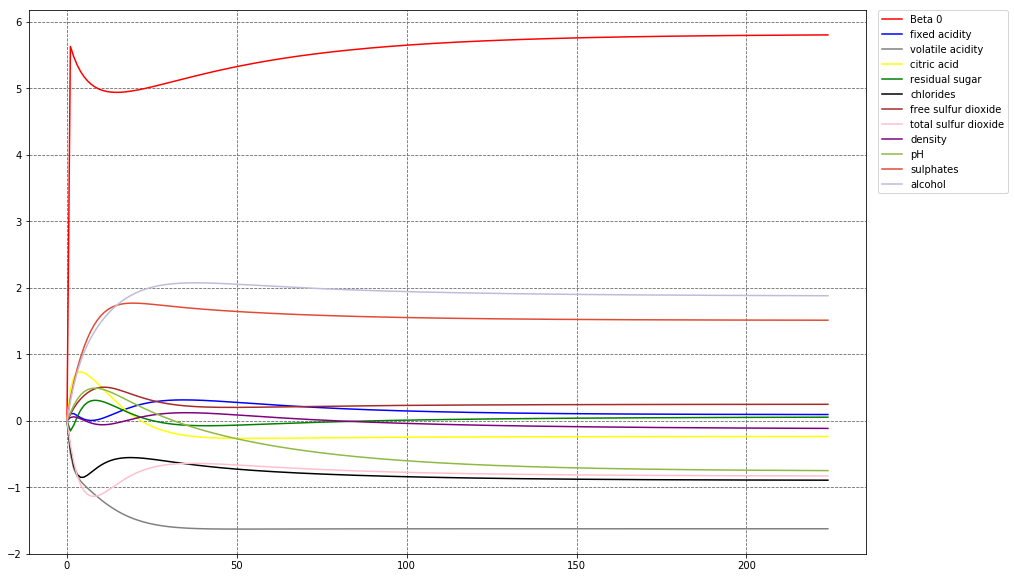

ValueError: x and y must have same first dimension, but have shapes (225,) and (106, 1)

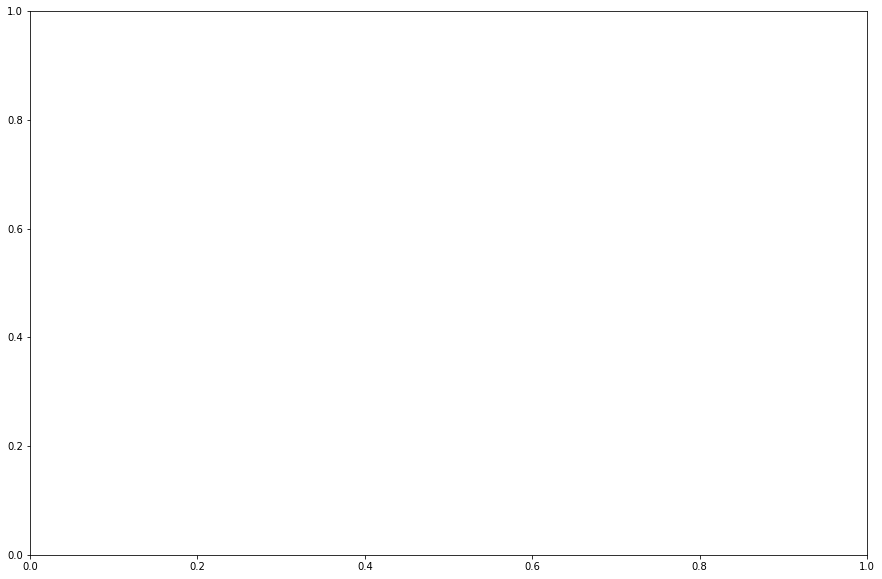

In [6]:
#!/usr/bin/env python
# coding: utf-8

# <br><br><center><h1 style="font-size:2.7em;color:#000">MACHINE LEARNING LAB - TUTORIAL 6</h1></center>
# <br>
# <h1 style="font-size:2em;color:#000">Juan Fernando Espinosa</h1>
# <h1 style="font-size:2em;color:#000">303158</h1>
# 
# ---

# <h3 style="font-size:2em;color:#ff4411">1. DATA PRE-PROCESSING</h3>

# In[96]:


import pandas as pd
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge, SGDRegressor, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D


# <h3 style="font-size:1.5em;color:#2467C0">D1 DATA</h3>

# In[97]:


x = np.random.normal(loc =1, scale =0.05, size=(100, 1))
psi = np.random.normal(loc =1, scale =0.05, size=(100, 1))
y = 1.3*x**2 + 4.8*x + 8 + psi
# Printing small range of data to improve visualization of results
print('X:',x[0:5])
print('\n')
print('y:',y[0:5])


# <h3 style="font-size:1.5em;color:#2467C0">D2 DATA</h3>

# In[98]:


missing_values = ['-','na','Nan','nan','n/a','?']
#red_wine = pd.read_csv('/winequality-red.csv', sep=';', na_values = missing_values)
D2 = pd.read_csv("winequality-red.csv", sep=';', na_values = missing_values)
D2.head()


# <h3 style="font-size:1.5em;color:#000">Check for missing or incongruent values</h3>

# In[99]:


# Check for missing or incongruent values
check = D2.empty
print('checking missing values:',check)
print('Sum of errors:',D2.isnull().sum())


# <h3 style="font-size:1.5em;color:#000">Normalization of the data</h3>

# In[100]:


def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm["quality"]=dataset["quality"]
    return dataNorm
D2 = normalize(D2)
D2.head()


# <h3 style="font-size:2em;color:#ff4411">2. GLMs</h3>
# 
# 
# ---

# ## Task A: pick 3 hyperparameters and learn each model (OLS, Ridge, LASSO)

# In[101]:


np.random.seed(0)
D2_train = D2.sample(frac=0.8)
D2_test = D2.drop(D2_train.index)


# ## Task B: pick 3 hyperparameters and learn each model (OLS, Ridge, LASSO)

# Since in the documentation it is said explicitly there is no need to create a column of ones for $$B_0$$ because the code already does that, the step is avoided.

# In[102]:


Y = D2_train['quality'].values
X = D2_train.drop(['quality'], axis=1).values
n = X.shape[1]
beta = np.zeros(n)
beta = np.reshape(beta, (len(beta),1))
Y_test = D2_test['quality'].values
Y_test = np.reshape(Y_test, (len(Y_test),1))
X_test = D2_test.drop(['quality'], axis=1).values


# ### Ordinary Least Squares

# In[103]:


def RMSE_function(y, y_hat):
    error = np.sqrt(np.sum((y - y_hat)**2)/y.shape[0])
    return error

def SGD_regression(X, y, X_test, y_test, u):
    total_train = 0
    total_test = 0
    train_RMSE = []
    test_RMSE = []
    sets_ols = linear_model.SGDRegressor(eta0 = u, warm_start=True, penalty=None, learning_rate='constant')
    for i in range(100):
        sets_it = sets_ols.partial_fit(X, Y)
        betas = sets_it.coef_
        y_hat = sets_it.predict(X)
        y_hat_test = sets_it.predict(X_test)
        total_train = np.sqrt(mean_squared_error(Y, y_hat))
        total_test = np.sqrt(mean_squared_error(Y_test, y_hat_test))
        train_RMSE.append(total_train)
        test_RMSE.append(total_test)

    return betas, total_train, total_test, train_RMSE, test_RMSE, total_test


# In[104]:


a, b, c, d, e, g= SGD_regression(X, Y, X_test, Y_test, 0.00001)
a, b, c, r, io, iu= SGD_regression(X, Y, X_test, Y_test, 0.0001)
a, b, c, p, u, cv= SGD_regression(X, Y, X_test, Y_test, 0.001)
print('RMSE test:', g)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), d)
plt.plot(rango*-1,e)
plt.title('Learning Rate = 0.00001')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()
print('RMSE test:', iu)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), r)
plt.plot(rango*-1,io)
plt.title('Learning Rate = 0.0001')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()
print('RMSE test:', cv)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), p)
plt.plot(rango*-1,u)
plt.title('Learning Rate = 0.001')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()



# ### RIDGE regression

# In[105]:


def RMSE_function(y, y_hat):
  error = np.sqrt(np.sum((y - y_hat)**2)/y.shape[0])
  return error

def SGD_regression_ridge(X, y, X_test, y_test, u, parameter):
    total_train = 0
    total_test = 0
    train_RMSE = []
    test_RMSE = []
    sets_ridge = linear_model.SGDRegressor(penalty='L2', alpha = parameter, eta0 = u, warm_start=True, learning_rate='constant')
    for i in range(100):
        sets_it = sets_ridge.partial_fit(X, Y)
        betas = sets_it.coef_
        y_hat = sets_it.predict(X)
        y_hat_test = sets_it.predict(X_test)
        total_train = np.sqrt(mean_squared_error(Y, y_hat))
        total_test = np.sqrt(mean_squared_error(Y_test, y_hat_test))
        train_RMSE.append(total_train)
        test_RMSE.append(total_test)

    return betas, total_train, total_test, train_RMSE, test_RMSE, total_test

    return betas, total_train, total_test, train_RMSE, test_RMSE


# In[106]:


a, b, c, d, e, g = SGD_regression_ridge(X, Y, X_test, Y_test, 0.0001,0.8)
a, b, c, r, io, hj = SGD_regression_ridge(X, Y, X_test, Y_test, 0.0001, 0.2)
a, b, c, p, u, lk = SGD_regression_ridge(X, Y, X_test, Y_test, 0.0001, 0.5)
print('RMSE test:', g)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), d)
plt.plot(rango*-1,e)
plt.title('Learning Rate = 0.0001 & Lambda = 0.8')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()

print('RMSE test:', hj)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), e)
plt.plot(rango*-1,io)
plt.title('Learning Rate = 0.0001 & Lambda = 0.2')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()

print('RMSE test:', lk)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), p)
plt.plot(rango*-1,u)
plt.title('Learning Rate = 0.0001 & Lambda = 0.5')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()


# ### LASSO

# In[107]:


def RMSE_function(y, y_hat):
  error = np.sqrt(np.sum((y - y_hat)**2)/y.shape[0])
  return error

def SGD_regression_lasso(X, y, X_test, y_test, u, parameter):
    total_train = 0
    total_test = 0
    train_RMSE = []
    test_RMSE = []
    sets_lasso = linear_model.SGDRegressor(tol=1e-3, penalty='L1', alpha = parameter, eta0 = u,  warm_start=True, learning_rate='constant')
    for i in range(100):
        sets_it = sets_lasso.partial_fit(X, Y)
        betas = sets_it.coef_
        y_hat = sets_it.predict(X)
        y_hat_test = sets_it.predict(X_test)
        #total_train = RMSE_function(Y, y_hat)
        total_train = np.sqrt(mean_squared_error(Y, y_hat))
        #total_test = RMSE_function(Y_test, y_hat_test)
        total_test = np.sqrt(mean_squared_error(Y_test, y_hat_test))
        train_RMSE.append(total_train)
        test_RMSE.append(total_test)

    return betas, total_train, total_test, train_RMSE, test_RMSE, total_test


# In[108]:


a, b, c, d, e, ae = SGD_regression_lasso(X, Y, X_test, Y_test, 0.0001, 0.8)
a, b, c, r, io, yu = SGD_regression_lasso(X, Y, X_test, Y_test, 0.0001, 0.2)
a, b, c, p, u, po = SGD_regression_lasso(X, Y, X_test, Y_test, 0.0001, 0.5)

print('RMSE test:', ae)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), d)
plt.plot(rango*-1,e)
plt.title('Learning Rate = 0.0001 & Lambda = 0.8')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()

print('RMSE test:', yu)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), r)
plt.plot(rango*-1,io)
plt.title('Learning Rate = 0.0001 & Lambda = 0.2')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()

print('RMSE test:', po)
fig= plt.figure(figsize=(6,6))
rango = np.array(range(100))
plt.plot(range(100), p)
plt.plot(rango*-1,u)
plt.title('Learning Rate = 0.0001 & Lambda = 0.5')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-100, 110)
plt.show()


# ## Task C: Tune the hyperparameters using GridSearchCV and plot the results.

# ### OLS

# In[109]:


model = SGDRegressor(warm_start=True, random_state=3)
param_grid = {
    'penalty': [None],
    'learning_rate': ['constant'],
    'eta0' : [0.0001, 0.00001, 0.001],
    'max_iter': [1000],
}
sets = GridSearchCV(model, param_grid, cv=5)
sets.fit(X, Y)
print("Best score: " + str(sets.best_score_))


# In[110]:


df = pd.DataFrame(sets.cv_results_)
df.sort_values('rank_test_score') # showing the results from the best to the worst. 


# In[111]:


df.plot(kind='bar',x='param_eta0', y='mean_test_score',color='blue')
plt.axhline(linewidth=1, color='red')
plt.title('Mean Test Score for OLS')
plt.show()


# ### RIDGE

# In[112]:


model = SGDRegressor(warm_start=True, random_state=3)
param_grid = {
    'penalty': ['L2'],
    'learning_rate': ['constant'],
    'eta0' : [0.001],
    'alpha':[0.001, 0.0001, 0.01],
    'max_iter': [1000],
}
sets_ridge = GridSearchCV(model, param_grid, cv=5)
sets_ridge.fit(X, Y)
print("Best score: " + str(sets.best_score_))


# In[113]:


df_ridge = pd.DataFrame(sets_ridge.cv_results_)
df_ridge.sort_values('rank_test_score') # showing the results from the best to the worst. 


# In[114]:


df_ridge.plot(kind='bar',x='param_alpha', y='mean_test_score',color='blue')
plt.axhline(linewidth=1, color='red')
plt.title('Mean Test Score for Ridge')
plt.show()


# ### LASSO

# In[115]:


model = SGDRegressor(warm_start=True, random_state=3)
param_grid = {
    'penalty': ['L1'],
    'learning_rate': ['constant'],
    'eta0' : [0.001],
    'alpha':[0.001, 0.0001, 0.01],
    'max_iter': [1000],
}
sets_lasso = GridSearchCV(model, param_grid, cv=5)
sets_lasso.fit(X, Y)
print("Best score: " + str(sets.best_score_))


# In[116]:


df_lasso = pd.DataFrame(sets_ridge.cv_results_)
df_lasso.sort_values('rank_test_score') # showing the results from the best to the worst. 


# In[117]:


df_ridge.plot(kind='bar',x='param_alpha', y='mean_test_score',color='blue')
plt.axhline(linewidth=1, color='red')
plt.title('Mean Test Score for LASSO')
plt.show()


# ## Task D: Evaluate the optimal hyperparameter on each model

# In[118]:


sets_ols = linear_model.SGDRegressor(eta0 = 0.001, warm_start=True, penalty=None, learning_rate='constant')
sets_ridge = linear_model.SGDRegressor(penalty='L2', alpha = 0.01, eta0 = 0.001, warm_start=True, learning_rate='constant')
sets_lasso = linear_model.SGDRegressor(tol=1e-3, penalty='L1', alpha = 0.01, eta0 = 0.001,  warm_start=True, learning_rate='constant')
print('Cross Validation OLS:',cross_val_score(sets_ols, X, Y, cv=5))
print('\n')
print('Cross Validation Ridge:',cross_val_score(sets_ridge, X, Y, cv=5))
print('\n')
print('Cross Validation Lasso:',cross_val_score(sets_lasso, X, Y, cv=5))
print('\n')


# In[119]:


fig, axs = plt.subplots(2, 2, figsize=(6, 6))

axs[0, 0].boxplot(cross_val_score(sets_ols, X, Y, cv=5))
axs[0, 0].set_title('OLS')

axs[0, 1].boxplot(cross_val_score(sets_ridge, X, Y, cv=5))
axs[0, 1].set_title('RIDGE')

axs[1, 0].boxplot(cross_val_score(sets_ridge, X, Y, cv=5))
axs[1, 0].set_title('LASSO')


fig.subplots_adjust(left=0.08, right=2, bottom=0.10, top=0.9, hspace=0.4, wspace=0.3)


# <h3 style="font-size:1.5em;color:#6e00db">Observations</h3>
# 
# ---
# <ol>
#     <li>OLS is returning lower values considering the different hyperparameter analyzed in the early steps.</li><br>
#     <li><strong>This conclusions may vary at the moment of running the code because of randomness.</strong></li><br>
#     <li>LASSO has a better distribution of the values: it contains all values near to the median. In addition, most of the data is located near to the 25 percentile. It has consistency through all datapoints.</li><br>
#     <li> OLS on the contrary, most of the scores are far away from the minimum. On the other hand, it has a good inner distribution: most of the values are located equally above or below the median: It means that in some way there is underfitting for several datapoints. The data would be not generalizing well.</li><br>
#     <li>Ridge experienced a different distribution: values close to the max but not far away from the min. In addition, the values are distributed with a majority located near to the 25 percentile.</li><br>
#     <li>Although both OLS and Ridge has minimum values (around 16) in my opinion is not good generalization by having such a gap between values.</li>
# </ol>

# <h3 style="font-size:2em;color:#ff4411">3. POLYNOMIAL REGRESSION</h3>
# 
# ---

# ## Task A: Prediction with high degree of polynomials

# In[120]:


plt.scatter(x,y)
plt.title('Datapoints distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# In[121]:


RMSE = []
def polynomial_regression(x, y, degree):
    polynomial_features= PolynomialFeatures(degree)
    x_poly = polynomial_features.fit_transform(x)
    
    linear_Regression = LinearRegression().fit(x_poly, y)
    
    y_hat = linear_Regression.predict(x_poly)
    
    error = RMSE_function(y, y_hat)  # function used in the previous exercise
    return error, y_hat, degree


# In[122]:


degress = [1, 2, 7, 10, 16, 100]
for i in range(len(degress)):
    RMSE, a, c = polynomial_regression(x, y, degress[i])
    print('Degree:', degress[i], 'RMSE',RMSE)


# In[123]:


a, b, c = polynomial_regression(x, y, 1)
d, e, t = polynomial_regression(x, y, 2)
h, i, p = polynomial_regression(x, y, 7)
k, l, ñ = polynomial_regression(x, y, 10)
n, o, s = polynomial_regression(x, y, 16)
q, r, v = polynomial_regression(x, y, 100)
fig, axs = plt.subplots(3, 2,figsize=(20,30))
axs[0, 0].scatter(x, y)
axs[0, 0].plot(x, b)
axs[0, 0].set_title('Degree = {} and RMSE: {}'.format(c,a))
axs[0, 1].scatter(x, y)
axs[0, 1].plot(x, e, 'tab:orange')
axs[0, 1].set_title('Degree = {} and RMSE: {}'.format(t,d))
axs[1, 0].scatter(x, y)
axs[1, 0].plot(x, i, 'tab:green')
axs[1, 0].set_title('Degree = {} and RMSE: {}'.format(p,h))
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x, l, 'tab:red')
axs[1, 1].set_title('Degree = {} and RMSE: {}'.format(ñ,k))
axs[2, 0].scatter(x, y)
axs[2, 0].plot(x, o, 'tab:blue')
axs[2, 0].set_title('Degree = {} and RMSE: {}'.format(s,n))
axs[2, 1].scatter(x, y)
axs[2, 1].plot(x, r, 'tab:gray')
axs[2, 1].set_title('Degree = {} and RMSE: {}'.format(v,q))

for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Predictions')


# <h3 style="font-size:1.5em;color:#6e00db">Observations</h3>
# 
# ---
# <ol>
#     <li>By plotting for the first time the datapoints it is possible to appreciate that they follow a <strong>linear distribution.</strong></li><br>
#     <li>Degree 2 graph shows that it is still possible to represent all the datapoints in a more <strong>accurate</strong> way (It reduces the distance for the far-away datapoints slightly). Moreover, there are no big distances from the mean to the datapoints, therefore no overfitting exists.</li><br>
#     <li> Unfortunately, from degree 7 and on the predictions are incurring in <strong>overfitting</strong>. Since the data follows a linear distribution it is not required an improvement to understand the relationship between the variables. The more we increase the degree, the more overfitting the result will be, the more datapoints the line will cross.</li>
# </ol>

# ## Task B: Effect of Regularization

# In[124]:


lambdas = [0, 0.000001, 0.01, 1]

def polynomial_regression(x, y, lambdas):
    polynomial_features= PolynomialFeatures(degree=10)
    x_poly = polynomial_features.fit_transform(x)
    
    ridge = linear_model.Ridge(lambdas).fit(x_poly, y)
    
    y_hat = ridge.predict(x_poly)
    
    error = RMSE_function(y, y_hat)  # function used in the previous exercise
    return error, y_hat, lambdas


# In[125]:


for i in range(len(lambdas)):
    RMSE, a, c = polynomial_regression(x, y, lambdas[i])
    print('Lambdas:', lambdas[i], 'RMSE',RMSE)
    #plt.scatter(x, y)
    #plt.plot(x, a, color='red')
    #plt.show()


# In[126]:


a, b, c = polynomial_regression(x, y, 0.0001)
d, e, t = polynomial_regression(x, y, 0.001)
h, i, p = polynomial_regression(x, y, 0.5)
k, l, ñ = polynomial_regression(x, y, 1)
fig, axs = plt.subplots(2, 2,figsize=(20,25))
axs[0, 0].scatter(x, y)
axs[0, 0].plot(x, b, 'tab:grey')
axs[0, 0].set_title('Lambda = {} and RMSE: {}'.format(c,a))
axs[0, 1].scatter(x, y)
axs[0, 1].plot(x, e, 'tab:orange')
axs[0, 1].set_title('Lambda = {} and RMSE: {}'.format(t,d))
axs[1, 0].scatter(x, y)
axs[1, 0].plot(x, i, 'tab:green')
axs[1, 0].set_title('Lambda = {} and RMSE: {}'.format(p,h))
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x, l, 'tab:red')
axs[1, 1].set_title('Lambda = {} and RMSE: {}'.format(ñ,k))

for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Predictions')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


# <h3 style="font-size:1.5em;color:#6e00db">Observations</h3>
# <p style="font-size:1em;color:#000"><strong>Reminder:</strong> The degree was settled to 10</p>
# 
# <ol>
#     <li>First, at simple sight it is possible to visualize how the parametrization reduces surprisingly the overfitting of the graphs. Considering a degree of 10 plotting an illustration that follows an almost linear line is a remarkable effective.<p style="font-size:0.8em;color:#000">For a clear identification please check graph 4 of previous plot and graphs 1 and 2 of current plot.</p> </li><br>
#     <li>Moreover, selecting the ideal parameter plays a major role: The degree of the graph suggest a high variance outcome and the objective is to find a trade-off to lower the variance without affecting the bias. If a big value of regularization is chosen the model will end with an underfitting outcome as it is possible to appreciate in graphs 3 and 4. </li><br>
#     <li>In addition, by playing along with the degrees, if degree 2 is chosen: the higher the value of the regularization, the more the curve will tend to 0(horizontal line - slope of 0).</li>
# </ol>

# <h3 style="font-size:2em;color:#ff4411">4. COORDINATE DESCENT</h3>
# 
# ---

# In[127]:


Y = D2_train['quality'].values
Y = np.reshape(y, (len(y),1))
X = D2_train.drop(['quality'], axis=1).values
column_one = np.ones((X.shape[0],1))
X = np.concatenate((column_one, X), axis = 1)
n = X.shape[1]
y_test = D2_test['quality'].values
y_test = np.reshape(y_test, (len(y_test),1))
y_test = np.reshape(y_test, (len(y_test),1))
X_test = D2_test.drop(['quality'], axis=1).values
column_ones = np.ones((X_test.shape[0],1))
X_test = np.concatenate((column_ones, X_test), axis = 1)


# In[128]:


Y = D2_train['quality'].values
Y = np.reshape(Y, (len(Y),1))
X = D2_train.drop(['quality'], axis=1).values
column_one = np.ones((X.shape[0],1)) # Adding Bias
X = np.concatenate((column_one, X), axis = 1)
n = X.shape[1]
beta = np.zeros(n)
beta = np.reshape(beta, (len(beta),1))
Y_test = D2_test['quality'].values
Y_test = np.reshape(Y_test, (len(Y_test),1))
X_test = D2_test.drop(['quality'], axis=1).values


# ## TASK A: Coordinate Descent

# In[129]:


def function(X, y, beta):
    function = np.dot((y - X@beta).T,(y - X@beta))
    return function


def coordinate_descent(X, y, beta):
    max_iters = 0
    for _ in range(300):
        max_iters += 1
        for i in range(len(X.T)):
            X_n = X.T[i]
            X_n = np.reshape(X_n, (len(X_n), 1))
            betas_xi = np.delete(beta, i, axis=0)
            X_m = np.delete(X.T, i, axis=0)
            betas_new = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
            beta[i] = betas_new
        historico.append(beta.copy())
        if function(X, y, historico[-2]) - function(X, y, historico[-1]) < 0.0001:
            return beta, historico, max_iters
    raise Exception('Not converged in maximum number of iterations')
    


# In[130]:


beta = np.zeros(X.shape[1])
beta = np.reshape(beta, (len(beta),1))
betas_array= []
betas_a= []
historico = []
historico.append(beta.copy())

betas, historico, iterations = coordinate_descent(X, Y, beta)
historico = np.array(historico)
print('Final Betas','\n', betas)
print('\n')
print('betas history','\n', historico[0:5].T) # printing the first 5 betas measured.
print('\n')
print('Total iterations until convergence', iterations)


# In[131]:


fig= plt.figure(figsize=(15,10))
plt.plot(range(iterations+1), historico[:,0], 'r', color="red", label='Beta 0')
plt.plot(range(iterations+1), historico[:,1], 'r', color="blue", label='fixed acidity')
plt.plot(range(iterations+1), historico[:,2], 'r', color="gray", label='volatile acidity')
plt.plot(range(iterations+1), historico[:,3], 'r', color="yellow", label='citric acid')
plt.plot(range(iterations+1), historico[:,4], 'r', color="green", label='residual sugar')
plt.plot(range(iterations+1), historico[:,5], 'r', color="black", label='chlorides')
plt.plot(range(iterations+1), historico[:,6], 'r', color="brown", label='free sulfur dioxide')
plt.plot(range(iterations+1), historico[:,7], 'r', color="pink", label='total sulfur dioxide')
plt.plot(range(iterations+1), historico[:,8], 'r', color="purple", label='density')
plt.plot(range(iterations+1), historico[:,9], 'r', color="#8EBA42", label='pH')
plt.plot(range(iterations+1), historico[:,10], 'r', color="#E24A33", label='sulphates')
plt.plot(range(iterations+1), historico[:,11], 'r', color="#bfbbd9", label='alcohol')
plt.legend(bbox_to_anchor=(1.17, 1),loc = 'upper right', borderaxespad=0)
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.show()





# In[134]:


fig= plt.figure(figsize=(15,10))
plt.plot(range(iterations+1), historic[:,0], 'r', color="red", label='Beta 0')
plt.plot(range(iterations+1), historic[:,1], 'r', color="blue", label='fixed acidity')
plt.plot(range(iterations+1), historic[:,2], 'r', color="gray", label='volatile acidity')
plt.plot(range(iterations+1), historic[:,3], 'r', color="yellow", label='citric acid')
plt.plot(range(iterations+1), historic[:,4], 'r', color="green", label='residual sugar')
plt.plot(range(iterations+1), historic[:,5], 'r', color="black", label='chlorides')
plt.plot(range(iterations+1), historic[:,6], 'r', color="brown", label='free sulfur dioxide')
plt.plot(range(iterations+1), historic[:,7], 'r', color="pink", label='total sulfur dioxide')
plt.plot(range(iterations+1), historic[:,8], 'r', color="purple", label='density')
plt.plot(range(iterations+1), historic[:,9], 'r', color="#8EBA42", label='pH')
plt.plot(range(iterations+1), historic[:,10], 'r', color="#E24A33", label='sulphates')
plt.plot(range(iterations+1), historic[:,11], 'r', color="#bfbbd9", label='alcohol')
plt.legend(bbox_to_anchor=(1.17, 1),loc = 'upper right', borderaxespad=0)
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.show()


# <h3 style="font-size:1.5em;color:#6e00db">Observations</h3>
# 
# 
# <ol>
#     <li>It is interesting to analyze the behavior of the bias: It starts with a value of 1, but in order to model the data it grows up to help the model reach convergence.</li><br>
#     <li>It is possible to appreciate that the model with regularization reaches convergence faster than otherwise.</li><br>
#     <li>Another interesting fact is the curvature of the lines in the first iterations: the curvature of the model with regularization identify faster the optimal by finding the ideal trade-off. Moreover, it is possible to appreciate the sparsity of the betas, which if the parameter is increasing all coefficients will tend to zero. After increasing lambda it is possible to identify the features with large signal, aka. influential ones. </li><br>
#     <li>The values of the betas are lower in the model with regularization considering the penalization formula. </li>
#      
#     



In [ ]:
# ## TASK B: Coordinate Descent with Lasso Regularization

# In[132]:


def function_Lasso(X, y, beta, X_n):
    function = (np.dot((y - X@beta).T,(y - X@beta)) + (1*(1/2))) / np.dot(X_n.T, X_n)
    return function

def coordinate_descent_Lasso(X, y, beta, parameter):
    max_iters = 0
    for j in range(300):
        max_iters += 1
        for i in range(len(X.T)):
            X_n = X.T[i]
            X_n = np.reshape(X_n, (len(X_n), 1))
            betas_xi = np.delete(beta, i, axis=0)
            X_m = np.delete(X.T, i, axis=0)
            betas = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
            error = (parameter*(1/2) / np.dot(X_n.T, X_n))
            if betas > error:
                betas_new = betas - error
            elif abs(betas) <= error:
                betas_new = 0
            elif betas < error:
                betas_new =  betas + error
            beta[i] = betas_new
        historico.append(beta.copy())
        if function_Lasso(X, y, historico[-2], X_n) - function_Lasso(X, y, historico[-1], X_n) < 0.0001:
            return beta, historico, max_iters

    raise Exception('Not converged in maximum number of iterations')


# In[133]:


beta = np.zeros(X.shape[1])
beta = np.reshape(beta, (len(beta),1))

historico = []
historico.append(beta.copy())

beta_final, historic, iterations = coordinate_descent_Lasso(X, Y, beta, 0.6)
historic = np.array(historic)
print('Final Betas','\n', beta_final)
print('\n')
print('betas history', '\n', historic[0:5].T) # Printing the first 5 Betas stored. 
print('\n')
print('Iterations until convergence:', iterations)